In [32]:
#Inspirational Quote:

'''If I collect butterflies and pin them to styrofoam this does not make me a scientist. 
If I collect data related to those butterflies like their physical attributes, their life spans, 
their flying patterns and their mating behavior this still does not qualify me as a scientist. 
If, however, I take those data and produce some conceptual abstraction in the form of laws or 
rules that capture the behavior of that phenomenon in the form of testable models, 
then I am doing science. These models can be passed on to future generations of scientists so that they may 
"stand on the shoulders of giants" and build a career around improving our understanding of the phenomenon.'''

'''Are testable models being built using real research on the underlying complexities that an organization 
is attempting to understand and anticipate?'''

'Are testable models being built using real research on the underlying complexities that an organization \nis attempting to understand and anticipate?'

In [33]:
#Import libraries
import pandas as pd
import numpy as np
import sklearn as sk

# Read In Data

In [99]:
# Read in data from CSV
df = pd.read_csv('Fake_Data_3.csv')

# Num Rows and Columns

In [100]:
print('We have {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

We have 100 rows and 5 columns.


# Look at first 5 Values

In [101]:
df.head()

,id,treated,nucleus,cytoplasm,wall
0,1,0,4.66,96.36,9.82
1,2,0,0.43,89.74,35.16
2,3,0,2.58,29.76,3.33
3,4,0,0.56,66.66,21.06
4,5,0,4.99,93.80,8.26


# # Obs, # Null, DataType

In [102]:
df.info() # obs, # null, data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
id           100 non-null int64
treated      100 non-null int64
nucleus      100 non-null float64
cytoplasm    100 non-null float64
wall         100 non-null float64
dtypes: float64(3), int64(2)
memory usage: 4.0 KB


# Count number and type of values in a column

In [124]:
#df["treated"].value_count() # only works on categorical / string vars?

# Check for Unique IDs and Missing Values

In [125]:
print('ID is unique.') if df.id.nunique() == df.shape[0] else print('oops')
print('We do not need to worry about missing values.') if df.count().min() == df.shape[0] else print('oops')

print("minimum num values", df.count().min()) 
print("number of rows", df.shape[0])

ID is unique.
We do not need to worry about missing values.
minimum num values 100
number of rows 100


# Stratified Summary Statistics

In [126]:
# http://bconnelly.net/2013/10/summarizing-data-in-python-with-pandas/

bytreatment = df.groupby('treated')

bytreatment['cytoplasm'].describe()

,count,mean,std,min,25%,50%,75%,max
treated,,,,,,,,
0,50.0,46.8060,28.551004,0.20,22.0425,41.660,72.15,96.36
1,50.0,94.5602,61.962369,0.52,38.1750,99.895,154.56,199.66


In [127]:
bytreatment['nucleus'].describe()

,count,mean,std,min,25%,50%,75%,max
treated,,,,,,,,
0,50.0,2.3078,1.623435,0.12,0.915,2.13,4.035,4.99
1,50.0,5.2560,2.615361,0.59,3.215,5.36,7.115,9.90


In [128]:
bytreatment['wall'].describe()

,count,mean,std,min,25%,50%,75%,max
treated,,,,,,,,
0,50.0,25.3156,14.636375,0.61,10.4750,27.815,37.4875,48.55
1,50.0,9.0270,5.774009,0.49,4.2825,9.310,12.9200,19.57


# Histograms

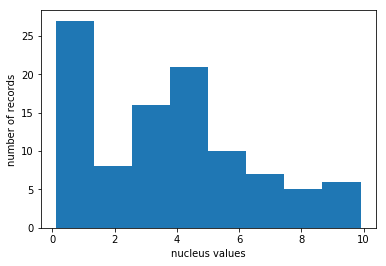

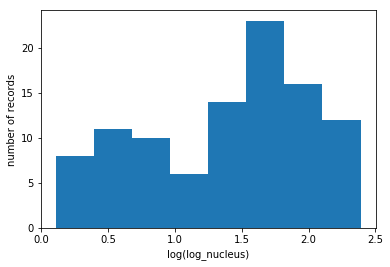

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot nucleus values by number of records
plt.hist(df['nucleus'].values, bins='auto')
plt.xlabel('nucleus values')
plt.ylabel('number of records')
plt.show()

#plot log of nucleus values by number of records
df['log_nucleus'] = np.log(df['nucleus'].values + 1)
plt.hist(df['log_nucleus'].values, bins='auto')
plt.xlabel('log(log_nucleus)')
plt.ylabel('number of records')
plt.show()

# Scatter Plot

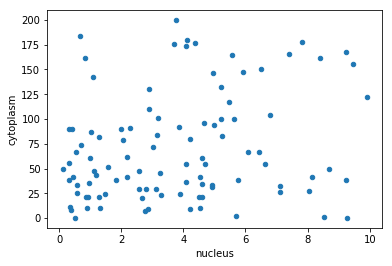

In [107]:
df.plot(kind="scatter", x="nucleus", y="cytoplasm")

# Bokeh Scatter Plot

In [108]:
from numpy.random import random
from bokeh.plotting import figure, show, output_file, curdoc
from bokeh.layouts import row

doc = curdoc()
curdoc().clear()

p = figure(title="nucleus - cytoplasm", toolbar_location=None)
p.grid.grid_line_color = "#dddddd"
p.background_fill_color = "#ffffff"

p.scatter(df.nucleus, df.cytoplasm, marker="circle", size=12, line_color=None, fill_color="green", alpha=0.4)
p.scatter(df.nucleus, df.wall, marker="circle", size=12, line_color=None, fill_color="blue", alpha=0.4)

show(p)

# Correlation Between Variables

In [131]:
df['cytoplasm'].corr(df['wall'])

-0.21325549613696876

# Correlation Matrix Visualization

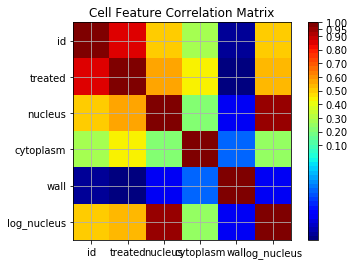

,id,treated,nucleus,cytoplasm,wall,log_nucleus
id,1.000000,0.866069,0.510065,0.292888,-0.545724,0.493257
treated,0.866069,1.000000,0.564626,0.447195,-0.594561,0.531627
nucleus,0.510065,0.564626,1.000000,0.230552,-0.411291,0.959400
cytoplasm,0.292888,0.447195,0.230552,1.000000,-0.213255,0.234958
wall,-0.545724,-0.594561,-0.411291,-0.213255,1.000000,-0.433198
log_nucleus,0.493257,0.531627,0.959400,0.234958,-0.433198,1.000000


In [159]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 50)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Cell Feature Correlation Matrix')
    labels=['y','id','treated','nucleus','cytoplasm','wall','log_nucleus']
    ax1.set_xticklabels(labels,fontsize=10)
    ax1.set_yticklabels(labels,fontsize=10)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95,1])
    plt.show()

correlation_matrix(df)

df.corr()

# Try and identify the healthiest diseased cell.

 ### Lets create a composite score and see which cell scores the highest

In [139]:
# https://stats.stackexchange.com/questions/276083/how-should-i-create-a-composite-score-from-my-multivariate-data-using-factor-ana

treated_nucleus_mean = 5.2560
bytreatment['nucleus'].mean()

treated
0    2.3078
1    5.2560
Name: nucleus, dtype: float64

In [140]:
treated_cytoplasm_mean = 94.5602
bytreatment['cytoplasm'].mean()

treated
0    46.8060
1    94.5602
Name: cytoplasm, dtype: float64

In [141]:
treated_wall_mean = 9.0270
bytreatment['wall'].mean()

treated
0    25.3156
1     9.0270
Name: wall, dtype: float64